In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = '../machine_learning/CCPP/CCPP/Folds5x2_pp.csv'
data = pd.read_csv(file)
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
data.shape

(9568, 5)

In [4]:
X = data[['AT', 'V', 'AP', 'RH']]
Y = data[['PE']]

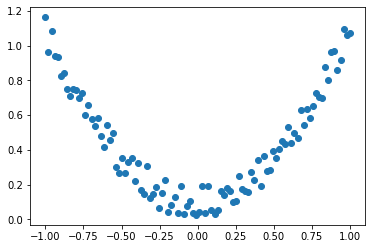

In [5]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2)+0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [6]:
import numpy as np
my_array = np.array(X)
my_array = my_array.astype(np.float32)
my_tensor = torch.tensor(my_array)
my_tensor.to(torch.float32)
print(my_tensor)

tensor([[   8.3400,   40.7700, 1010.8400,   90.0100],
        [  23.6400,   58.4900, 1011.4000,   74.2000],
        [  29.7400,   56.9000, 1007.1500,   41.9100],
        ...,
        [  15.9900,   43.3400, 1014.2000,   78.6600],
        [  17.6500,   59.8700, 1018.5800,   94.6500],
        [  23.6800,   51.3000, 1011.8600,   71.2400]])


In [7]:
my_array_Y = np.array(Y)
my_array_Y = my_array_Y.astype(np.float32)
my_tensor_y = torch.tensor(my_array_Y)
my_tensor_y.to(torch.float32)
print(my_tensor_y)

tensor([[480.4800],
        [445.7500],
        [438.7600],
        ...,
        [465.9600],
        [450.9300],
        [451.6700]])


两层神经网络求解

In [8]:
import torch.nn.functional as F     # 激励函数都在这
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=4, n_hidden=10, n_output=1)

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (4 -> 10)
  (predict): Linear (10 -> 1)
)
"""

Net(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (4 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

In [9]:
# optimizer 是训练的工具
optimizer1 = torch.optim.SGD(net.parameters(), lr=0.01)  # 传入 net 的所有参数, 学习率
loss_func1 = torch.nn.MSELoss(size_average=True)      # 预测值和真实值的误差计算公式 (均方差)

for t in range(1000):
    prediction = net(my_tensor)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func1(prediction, my_tensor_y)     # 计算两者的误差
    optimizer1.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer1.step()        # 将参数更新值施加到 net 的 parameters 上
    print(t, loss)
    print(net.predict.bias.item())

d:\pycharmprojects\myproject\venv\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 tensor(215528.5312, grad_fn=<MseLossBackward0>)
9.020560264587402
1 tensor(7.9951e+18, grad_fn=<MseLossBackward0>)
-56550156.0
2 tensor(3.1980e+15, grad_fn=<MseLossBackward0>)
-55419144.0
3 tensor(3.0713e+15, grad_fn=<MseLossBackward0>)
-54310752.0
4 tensor(2.9497e+15, grad_fn=<MseLossBackward0>)
-53224528.0
5 tensor(2.8329e+15, grad_fn=<MseLossBackward0>)
-52160028.0
6 tensor(2.7207e+15, grad_fn=<MseLossBackward0>)
-51116820.0
7 tensor(2.6130e+15, grad_fn=<MseLossBackward0>)
-50094476.0
8 tensor(2.5095e+15, grad_fn=<MseLossBackward0>)
-49092576.0
9 tensor(2.4101e+15, grad_fn=<MseLossBackward0>)
-48110716.0
10 tensor(2.3147e+15, grad_fn=<MseLossBackward0>)
-47148492.0
11 tensor(2.2230e+15, grad_fn=<MseLossBackward0>)
-46205512.0
12 tensor(2.1350e+15, grad_fn=<MseLossBackward0>)
-45281392.0
13 tensor(2.0504e+15, grad_fn=<MseLossBackward0>)
-44375756.0
14 tensor(1.9692e+15, grad_fn=<MseLossBackward0>)
-43488232.0
15 tensor(1.8913e+15, grad_fn=<MseLossBackward0>)
-42618460.0
16 tensor(1

线性回归求解

In [19]:
class Model(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_output):
        super(Model, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.Linear = torch.nn.Linear(n_feature, n_output)   # 隐藏层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = self.Linear(x)             # 输出值
        return x

model = Model(n_feature=4, n_output=1)

In [25]:
# optimizer 是训练的工具
optimizer1 = torch.optim.SGD(net.parameters(), lr=2)  # 传入 net 的所有参数, 学习率
loss_func1 = torch.nn.MSELoss(reduction='mean')      # 预测值和真实值的误差计算公式 (均方差)

for t in range(1000):
    prediction = model(my_tensor)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func1(prediction, my_tensor_y)     # 计算两者的误差
    optimizer1.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer1.step()        # 将参数更新值施加到 net 的 parameters 上
    print(t, loss)
    print(model.Linear.bias.item())

0 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
1 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
2 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
3 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
4 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
5 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
6 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
7 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
8 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
9 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
10 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
11 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
12 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
13 tensor(9491.2119, grad_fn=<MseLossBackward0>)
-0.01667344570159912
14 tensor(9491.2119, grad_fn=<